In [103]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
from numpy import zeros_like
from IPython.display import display
def display_matrix(m):
    display(sympy.Matrix(m))
import sympy
import pandas as pd
import scipy.stats as ss

sympy.init_printing()

# Processer

In [104]:
deg = 3
basis = 'legendre'
#initial price list
S0 = 40
K = 40

#mu = 0.06
r = 0.06
T = 1
I = 10
paths = 10
m = 1
v = 0.02

GBM_lam = 0
GBM_sigma = 0.04
GBM_mu = r
GBM_v = 0

LN_lam = 1
LN_sigma = 0.02
LN_mu = r
LN_v = 0.02

JR_lam = 0.01
JR_sigma = 0.03
JR_mu = r + JR_lam

df = np.exp(-mu*T)
dt = T / I

In [105]:
Size = (I+1, paths)

Z = np.random.standard_normal(size=Size)
N = np.random.poisson(LN_lam * dt, size=Size)
Y = np.random.lognormal(m, np.sqrt(LN_v), size=Size)

M = N * np.log(Y)


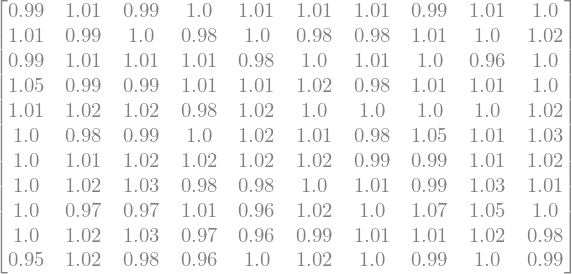

1.0020422475801742
0.0003735293996853954


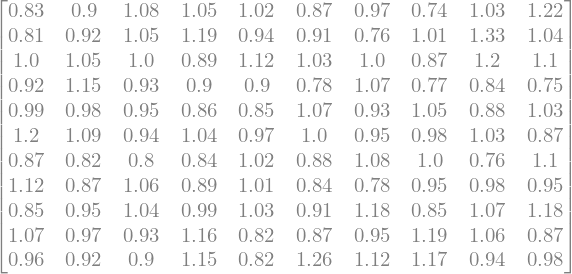

0.9757068509874051
0.01527343705271246


In [132]:
Y = np.random.lognormal(0, LN_v, size=Size)
display_matrix(Y.round(2))
print(np.mean(Y))
print(np.var(Y))

X = np.random.lognormal(0, np.sqrt(LN_v), size=Size)
display_matrix(X.round(2))

print(np.mean(X))
print(np.var(X))

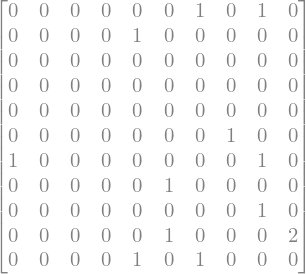

0.11818181818181818


In [107]:
display_matrix(N)
print(np.mean(N))

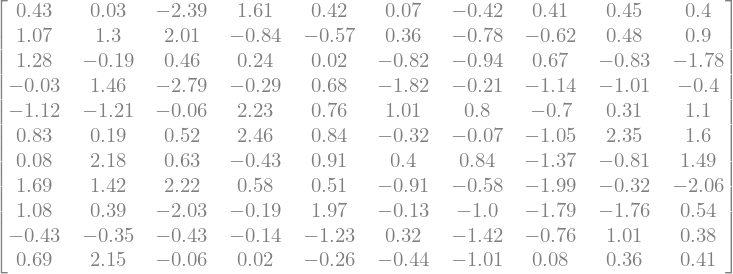

In [108]:
display_matrix(Z.round(2))

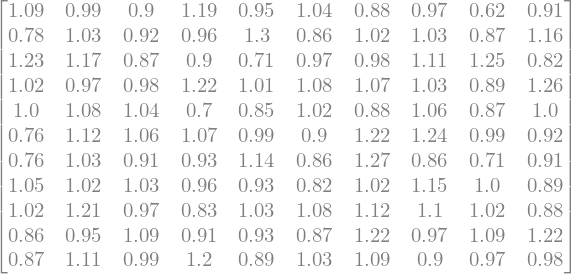

In [109]:
Y = np.log(Y)
display_matrix(Y.round(2))

In [110]:
print(np.sqrt(dt))

0.31622776601683794


In [111]:
def merton_jump_paths(S0, paths, lam, sigma, mu, v, m, T, I):
    np.random.seed(42)
    matrix = np.zeros((paths, I))
    matrixM = np.zeros((paths, I))
    matrixN = np.zeros((paths, I))
    matrixX = np.zeros((paths, I))
    for k in range(paths):
        X = np.zeros(I)
        S = np.zeros(I)
        M1 = np.zeros(I)
        N1 = np.zeros(I)

        
        S[0] = S0
        X[0] = np.log(S0)
        
        dt = T / I
    
        for i in range(1,I):
            Z = np.random.standard_normal()
            N = np.random.poisson(lam * dt)
            #Y = np.exp(np.random.normal(m,v,N))
            Y = np.random.lognormal(m,np.sqrt(v))
    
            if N == 0:
                M = 0
            else:
                for j in range(N):
                    M = np.sum(np.log(Y))
                
            X[i] = X[i-1] + (mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z + M
            S[i] = np.exp(X[i])
            M1[i] = M
            N1[i] = N
        matrixX[k] = X
        matrix[k] = S
        matrixM[k] = M1
        matrixN[k] = N1

    return matrix, matrixM, matrixN, matrixX

def merton_jump_paths1(S0, paths, lam, sigma, mu, v, m, T, I):
    np.random.seed(42)
    matrix = np.zeros((paths, I))
    for k in range(paths):
        X = np.zeros(I)
        S = np.zeros(I)
        
        S[0] = S0
        X[0] = np.log(S0)
        
        dt = T / I
    
        for i in range(1,I):
            Z = np.random.standard_normal()
            Z2 = np.random.standard_normal()
            N = np.random.poisson(lam * dt)

            if N == 0:
                M = 0
            else:
                M = m * N + np.sqrt(v) * np.sqrt(N) * Z2
                
            X[i] = X[i-1] + (mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z + M
            S[i] = np.exp(X[i])
        matrix[k] = S
    return matrix

In [112]:
merton_jump_paths(S0, paths, LN_lam, LN_sigma, LN_mu, LN_v, m, T, I)

(array([[ 40.        ,  40.36652895,  40.57314887,  40.75610213,
          40.93988462,  41.59885242, 105.29413195, 105.57443246,
         106.37031343, 105.7212467 ],
        [ 40.        ,  39.98297537,  40.30281116,  40.92212208,
          41.10882688,  41.21325326,  41.48954309,  41.58013999,
          41.75243679,  41.99927902],
        [ 40.        ,  90.85411079,  92.03246612, 256.61107306,
         259.35870813, 261.19725944, 262.57177709, 263.6441123 ,
         264.45386135, 267.82469058],
        [ 40.        ,  40.32248046, 119.43571323, 120.82858355,
         120.90984662, 121.3974129 , 121.75599535, 122.34253731,
         123.71043806, 125.52453946],
        [ 40.        ,  40.33205818,  40.40875808,  40.64191657,
          41.29228329,  41.56282638,  41.73312102,  41.92514455,
          42.27197487, 107.12879581],
        [ 40.        ,  40.47356178,  40.80106443,  41.0709945 ,
          41.57123207,  41.63529386,  41.79830967,  42.12783682,
          42.45054655,  42.324

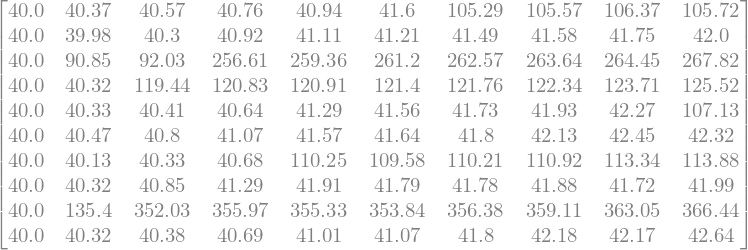

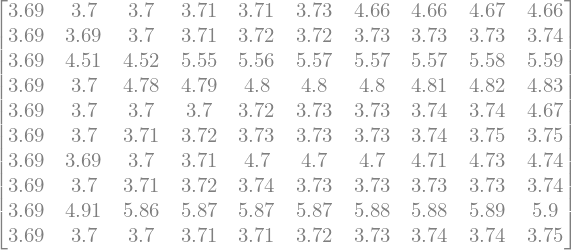

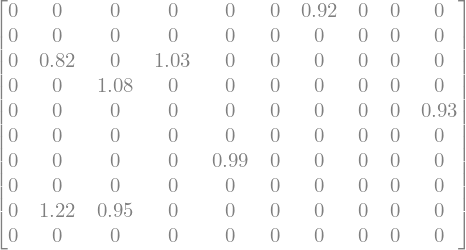

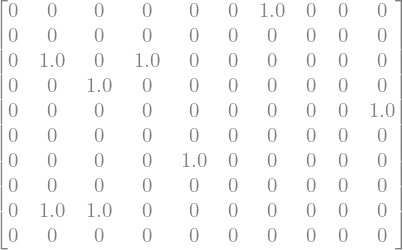

In [113]:
LN1 = merton_jump_paths1(S0, paths, LN_lam, LN_sigma, LN_mu, LN_v, m, T, I)
LN, M, N, X = merton_jump_paths(S0, paths, LN_lam, LN_sigma, LN_mu, LN_v, m, T, I)

display_matrix(LN.round(2))
display_matrix(X.round(2))
display_matrix(M.round(2))
display_matrix(N.round(2))

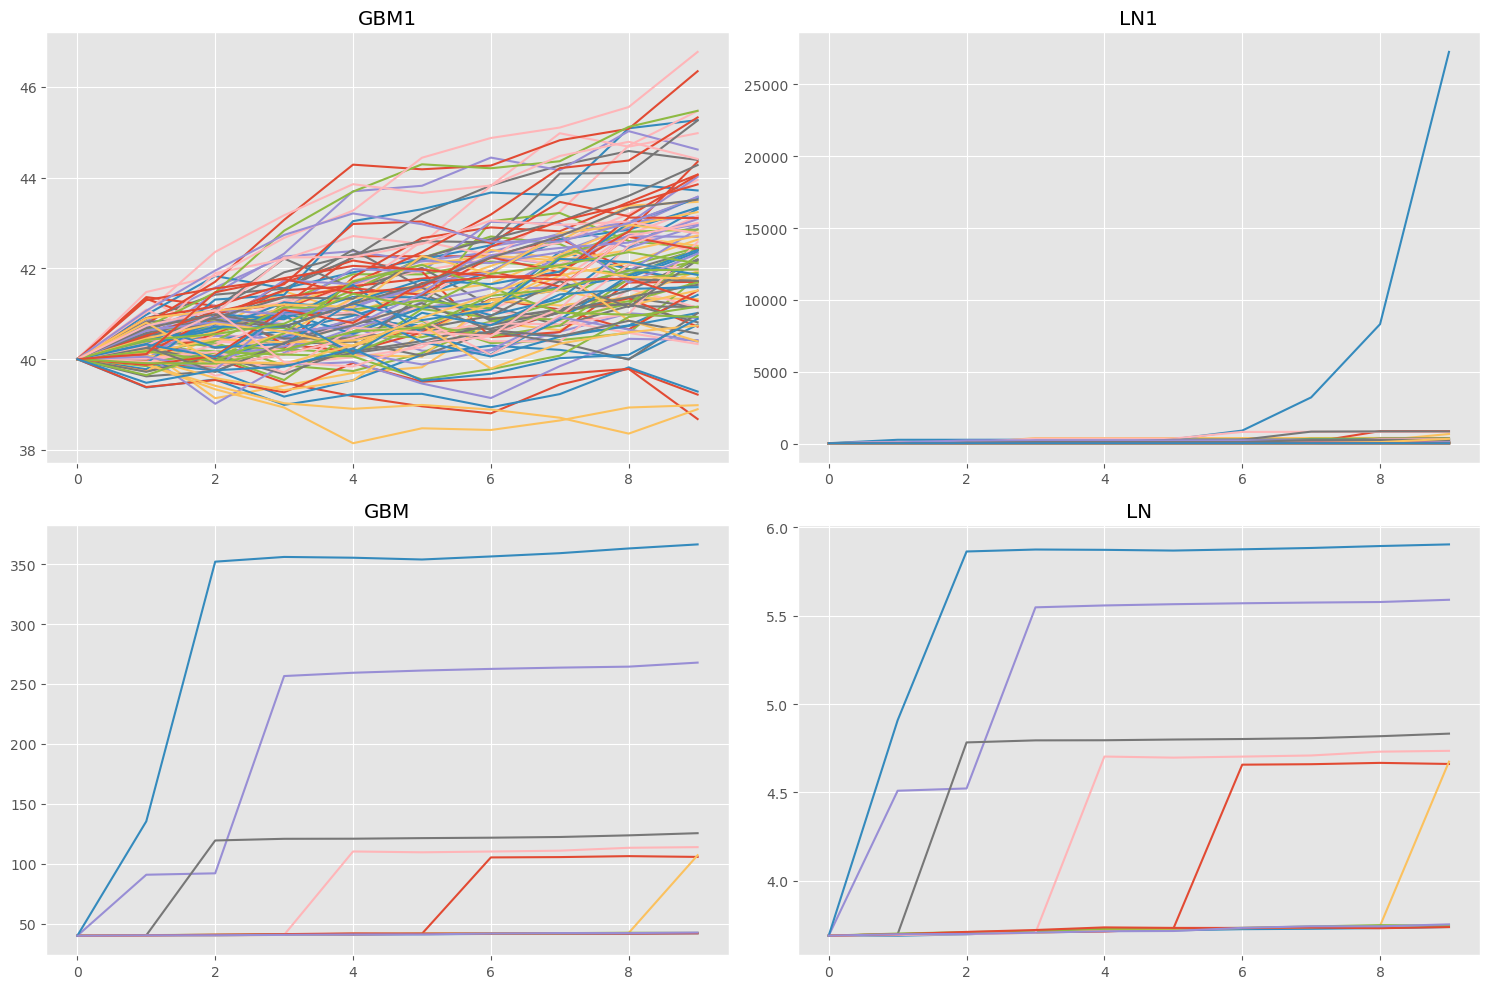

In [114]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))  # Adjust the figsize as needed

# Plotting for the first row
axes[0, 0].plot(merton_jump_paths1(S0, 100, GBM_lam, GBM_sigma, GBM_mu, GBM_v, m, 1, I).T)
axes[0, 0].set_title('GBM1')
axes[0, 1].plot(merton_jump_paths1(S0, 100, LN_lam, LN_sigma, LN_mu, LN_v, m, 1, I).T)
axes[0, 1].set_title('LN1')

# Plotting for the second row
axes[1, 0].plot(LN.T)
axes[1, 0].set_title('GBM')
axes[1, 1].plot(X.T)
axes[1, 1].set_title('LN')

plt.tight_layout()  # This ensures that the subplots fit nicely in the figure area
plt.show()

In [115]:
def merton_jump_paths1(S0, paths, lam, sigma, mu, v, m, T, I):
    size=(I,paths)
    dt = T/I 
    poi_rv = np.multiply(np.random.poisson( lam*dt, size=size), np.random.normal(m,v, size=size)).cumsum(axis=0)
    geo = np.cumsum(((mu -  sigma**2/2 -lam*(m  + v**2*0.5))*dt + sigma*np.sqrt(dt) * np.random.normal(size=size)), axis=0)
    return np.exp(geo+poi_rv)*S0

In [116]:
size=(I,paths)
dt = T/I 
poi_rv = np.multiply(np.random.poisson( LN_lam*dt, size=size), np.random.normal(m,np.sqrt(v), size=size)).cumsum(axis=0)
geo = np.cumsum(((mu -  LN_sigma**2/2 -LN_lam*(m  + v**2*0.5))*dt + LN_sigma*np.sqrt(dt) * np.random.normal(size=size)), axis=0)

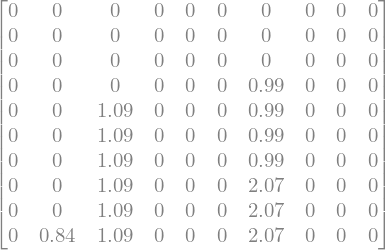

In [117]:
display_matrix(poi_rv.round(2))

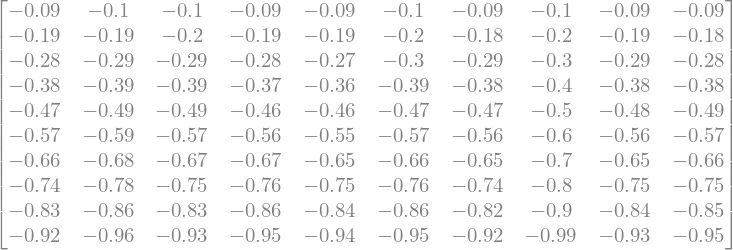

In [118]:
display_matrix(geo.round(2))

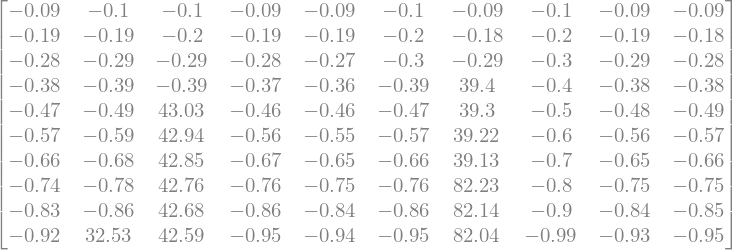

In [119]:
S = geo+poi_rv * S0
display_matrix(S.round(2))

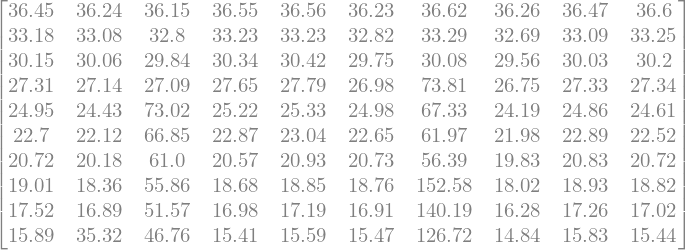

In [120]:
S = np.exp(geo+poi_rv)*S0
display_matrix(S.round(2))